# ANZ Virtual Internship (Task-1)

## Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading the Dataset and checking for general information

In [2]:
dataset=pd.read_excel('ANZ synthesised transaction dataset.xlsx')
dataset.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# for checking rows and columns present in dataset
#(rows,columns)

dataset.shape

(12043, 23)



> The dataset contains 12043 transcation of 100 customers.The transaction period is from 01/08/2018 - 31/10/2018 which is of 92 days duration.There are some columns with missing values which due to nature of transaction. 



In [4]:
#Checking for Unique Customer

print('Unique Customer:',dataset['customer_id'].nunique())

#checking for dataset info

dataset.info()

Unique Customer: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64

# Cleaning the data



*   Eliminating the column with most missing values
*   Eliminating Unwanted columns



In [5]:
#checking for % null value present in each column

for col in dataset.columns:
    pMissingValues=100*(np.mean(dataset[col].isnull()))
    print('{} % of missing values in {}'.format(pMissingValues,col))

0.0 % of missing values in status
35.92128207257328 % of missing values in card_present_flag
92.65133272440423 % of missing values in bpay_biller_code
0.0 % of missing values in account
0.0 % of missing values in currency
0.0 % of missing values in long_lat
0.0 % of missing values in txn_description
35.92128207257328 % of missing values in merchant_id
92.66793988208917 % of missing values in merchant_code
0.0 % of missing values in first_name
0.0 % of missing values in balance
0.0 % of missing values in date
0.0 % of missing values in gender
0.0 % of missing values in age
35.92128207257328 % of missing values in merchant_suburb
35.92128207257328 % of missing values in merchant_state
0.0 % of missing values in extraction
0.0 % of missing values in amount
0.0 % of missing values in transaction_id
0.0 % of missing values in country
0.0 % of missing values in customer_id
35.92128207257328 % of missing values in merchant_long_lat
0.0 % of missing values in movement




> It is noticed that there are almost 92 % of missing values which is due to nature of transaction where merchants are not involved.



In [6]:
#removing the col with highet missing values

missing=['bpay_biller_code','merchant_code']
dataset.drop(missing,axis=1,inplace=True)

In [7]:
#adding month feature

dataset["date"] = pd.to_datetime(dataset["date"])

months=[]
for date in dataset['date']:
  if date.month==8:
    months.append('August')
  elif date.month==9:
    months.append('September')
  elif date.month==10:
    months.append('October')

dataset['Month_of_Transaction']=months

#Exploratory Data Analysis(EDA)

### 1.Total Transcaction on each day

> It is seen that most of the transactions were done on 28th September 2018 (which is 174 transaction) and least were done on 30th October 2018 
(89 transaction). The transaction period was of 92 days and only 91 days are seen here.So the missing date of transaction turned out to be 2018-08-16.



In [8]:
dataset['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [9]:
#missing Date

pd.date_range(np.min(dataset['date']),np.max(dataset['date'])).difference(dataset['date'])

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

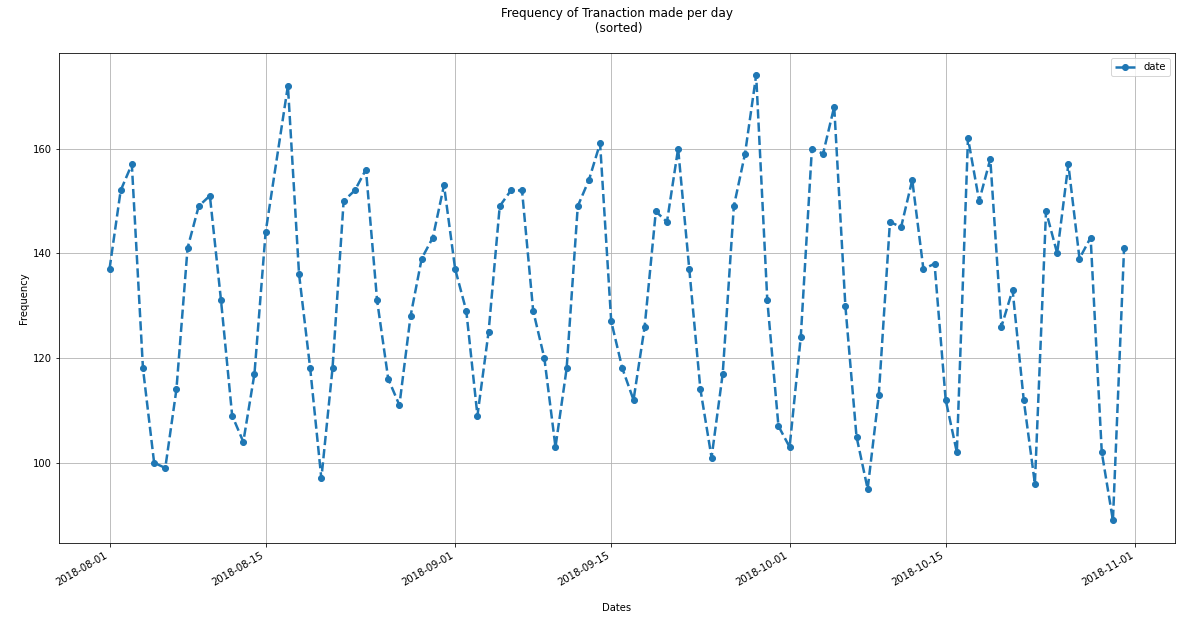

<Figure size 432x288 with 0 Axes>

In [10]:
dataset['date'].value_counts(sort=True).plot(kind='line',linewidth=2.5,linestyle='--',marker='o',figsize=(20, 10))
plt.xlabel('\nDates')
plt.ylabel('\nFrequency')
plt.title('Frequency of Tranaction made per day\n (sorted)\n')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Transaction_per_day.png')

### 2.Total transaction by each customer


> Here is the list of number of transaction made by each customer.It is seen that Michel made the most and Jonathan made the least number of transaction in the period of 3 months. 



In [11]:
dataset['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [12]:
dataset['first_name'].value_counts()

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

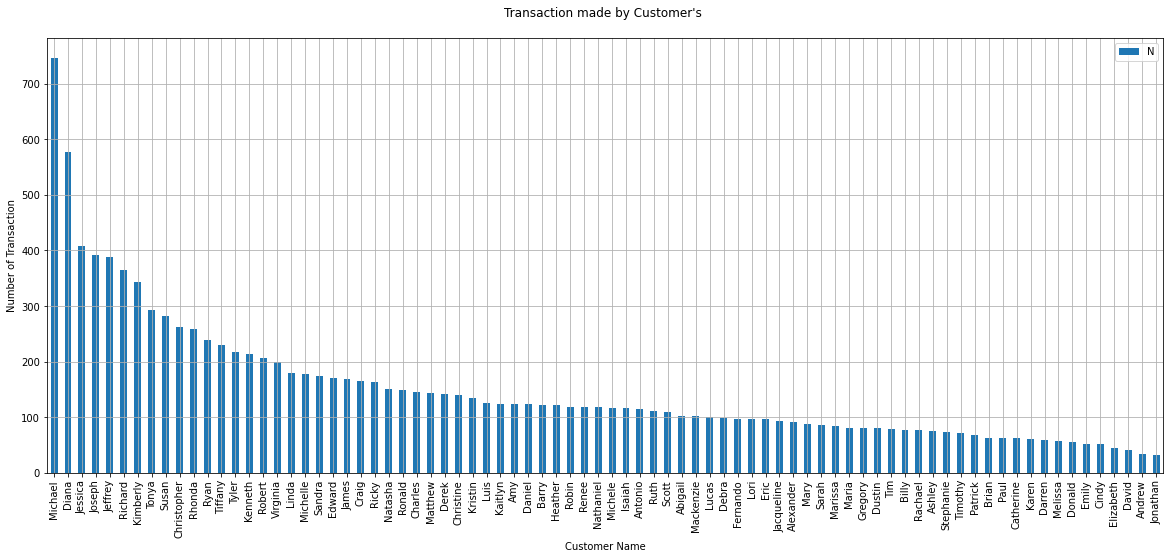

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(20,8))
dataset['first_name'].value_counts().plot.bar()
plt.title("Transaction made by Customer's \n")
plt.xlabel("Customer Name")
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel("Number of Transaction")
plt.legend('Name of Customer')
plt.show()
plt.savefig('Transaction_per_customer.png')

### 3. Types of Transaction

> Transaction description







In [14]:
dataset['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

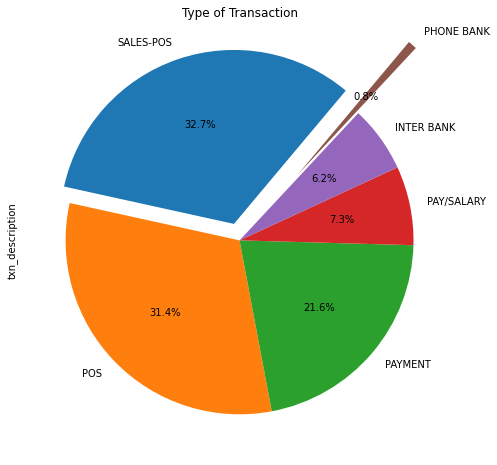

In [15]:
plt.figure(figsize=(8,8))
explode=(0.1,0,0,0,0,0.5)
dataset['txn_description'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', startangle=50)
plt.title('Type of Transaction')
plt.show()


>Movement type(Credit or Debit)

In [16]:
dataset['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

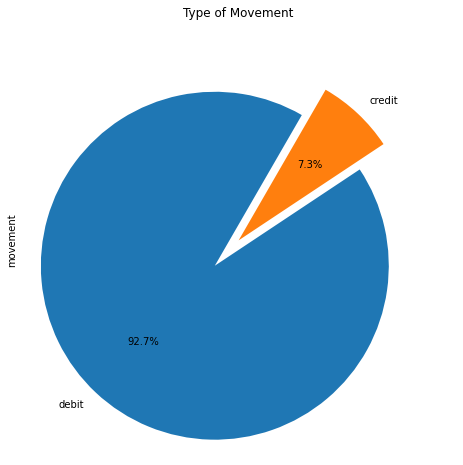

In [17]:
plt.figure(figsize=(8,8))
explode=(0.2,0)
dataset['movement'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', startangle=60)
plt.title('Type of Movement')
plt.show()



> Transaction Status



In [18]:
dataset['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

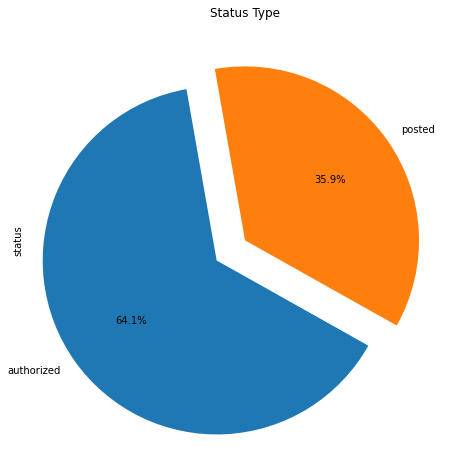

In [19]:
plt.figure(figsize=(8,8))
explode=(0.2,0)
dataset['status'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', startangle=100)
plt.title('Status Type')
plt.show()

### 4.Transaction Volume Each Day

> Here are the avarage transaction processed each day in the duration of 3 month period.


In [20]:
dataset_date_count = dataset.groupby("date").count()
trans_vol = dataset_date_count["customer_id"].mean()
print("Average Transaction Volume :",trans_vol)
nPoints1 = len(dataset_date_count.index)

Average Transaction Volume : 132.34065934065933


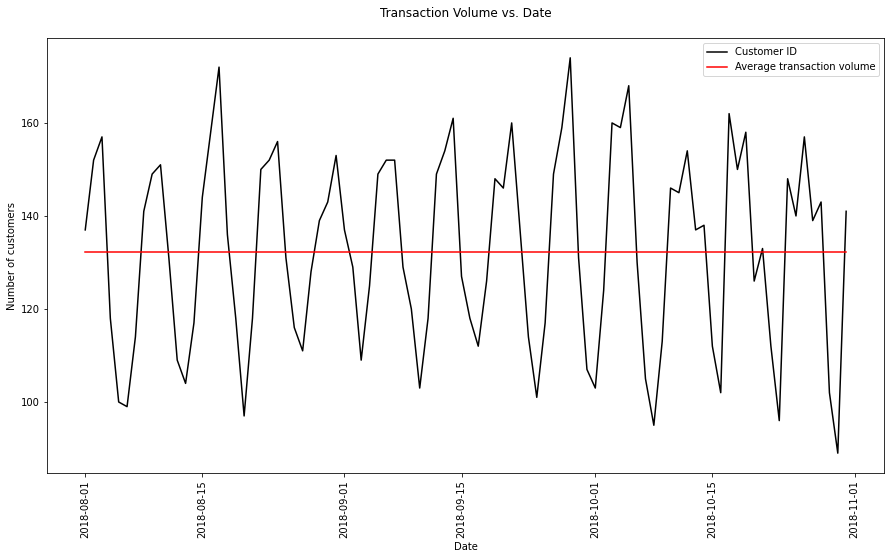

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(15,8))
plt.plot(dataset_date_count.index, dataset_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(dataset_date_count.index, np.linspace(trans_vol,trans_vol,nPoints1), c="r", label = "Average transaction volume")
plt.title("Transaction Volume vs. Date\n")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Number of customers")
plt.legend()
plt.show()
plt.savefig('Transaction_volume.png')

### 5.Average Transaction amount each day


> Here are the average transaction amount made. 



In [22]:
dataset_date_mean = dataset.groupby("date").mean()
trans_amt = dataset_date_mean["amount"].mean()
print("Average Transaction Amount is:",trans_amt)
nPoints2 = len(dataset_date_count.index)

Average Transaction Amount is: 190.61056774083966


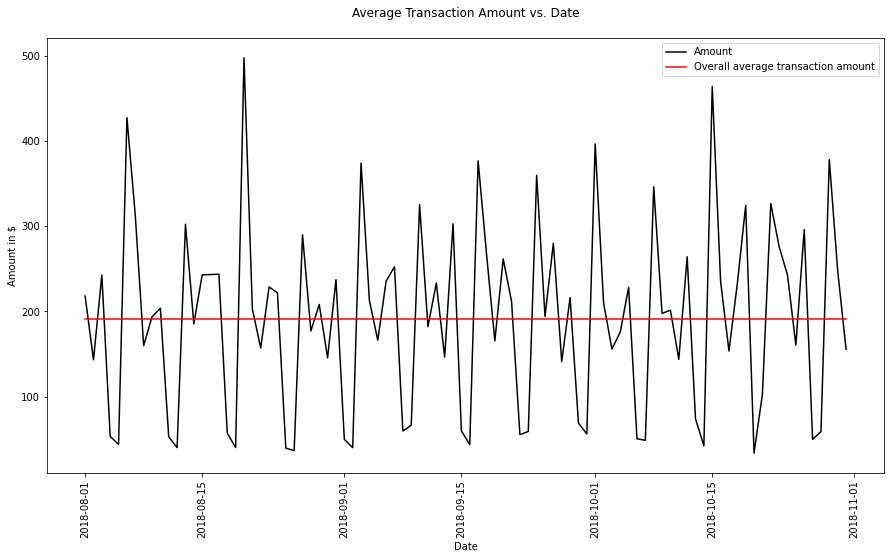

In [23]:
plt.figure(figsize=(15,8))
plt.plot(dataset_date_count.index, dataset_date_mean["amount"], c="black", label = "Amount")
plt.plot(dataset_date_count.index, np.linspace(trans_amt,trans_amt,nPoints2), c="r", label = "Overall average transaction amount")
plt.title("Average Transaction Amount vs. Date\n")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Amount in $")
plt.legend()
plt.show()

### 6.Transaction made every month


> Number of transaction made in each month



In [24]:
dataset['Month_of_Transaction'].value_counts()

October      4087
September    4013
August       3943
Name: Month_of_Transaction, dtype: int64

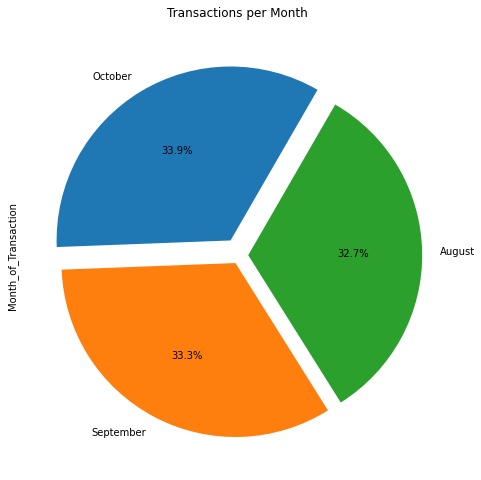

In [25]:
plt.figure(figsize=(8,8))
explode=(0.1,0.05,0.05)
dataset['Month_of_Transaction'].value_counts().plot.pie(explode=explode,autopct='%1.1f%%', startangle=60)
plt.title('Transactions per Month \n')
plt.show()

###7. Average Customer balance and amount by age 




In [26]:
month=['August','September','October']

* Customer Balance

---


1.   August
2.   September
3.   October




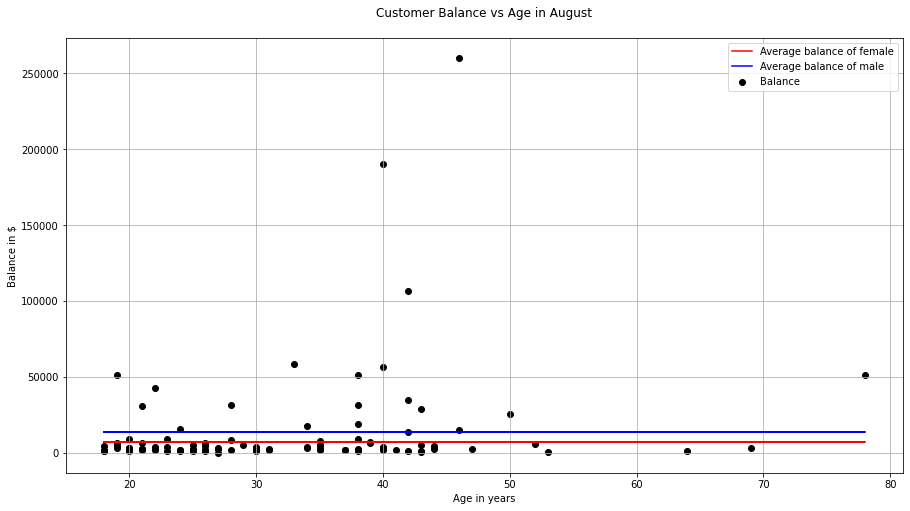

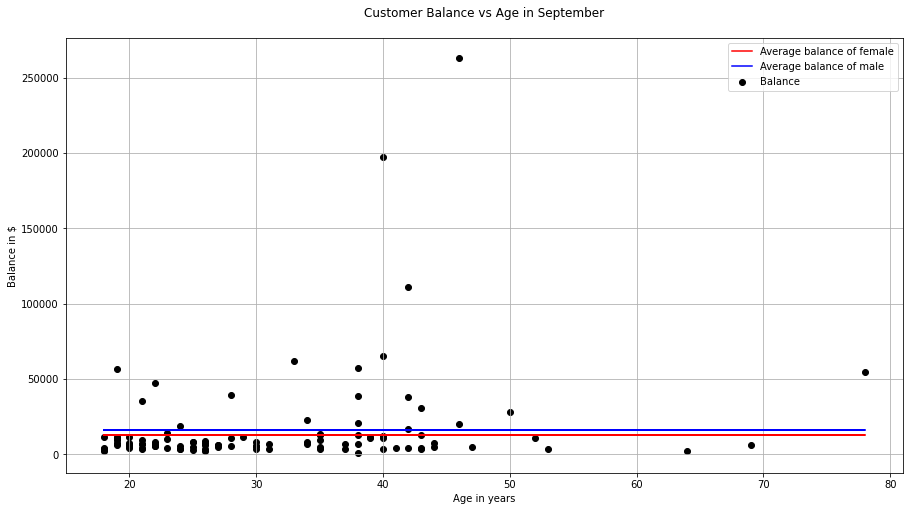

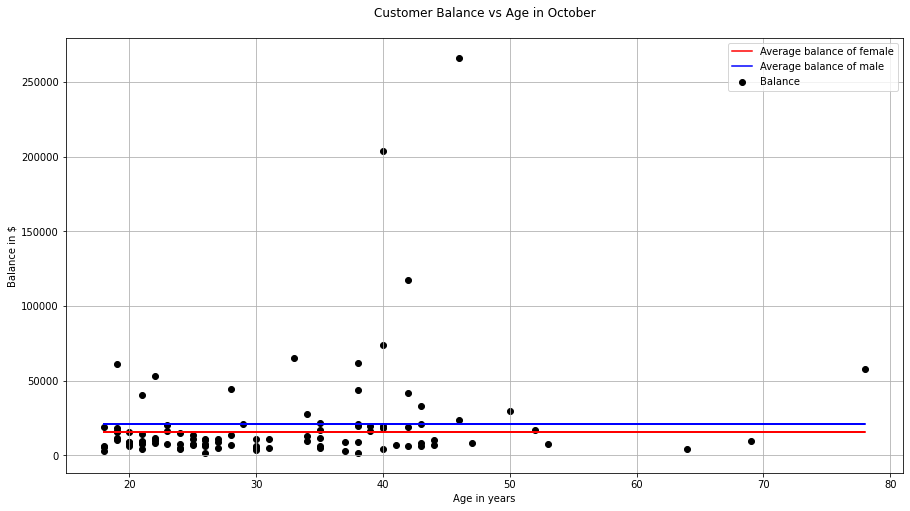

In [27]:
for m in month:
  dataset_cust = dataset[dataset["Month_of_Transaction"] == m].groupby("customer_id").mean()
  dataset_gen = dataset[dataset["Month_of_Transaction"] == m].groupby("gender").mean()

  mean_female_bal = dataset_gen["balance"].iloc[0]
  mean_male_bal = dataset_gen["balance"].iloc[1]
  nPoints=len(dataset_cust["age"])

  plt.figure(figsize=(15,8))
  plt.scatter(dataset_cust["age"], dataset_cust["balance"], c="black", label="Balance")
  plt.plot(dataset_cust["age"], np.linspace(mean_female_bal,mean_female_bal,nPoints), c="r", label = "Average balance of female")
  plt.plot(dataset_cust["age"], np.linspace(mean_male_bal,mean_male_bal,nPoints), c="b", label = "Average balance of male")
  plt.title("Customer Balance vs Age in {}\n".format(m))
  plt.xlabel("Age in years")
  plt.grid(True)
  plt.ylabel("Balance in $")
  plt.legend()
  plt.show()

* Customer Average Payment Amount

---


1.   August
2.   Septeber
3.   October




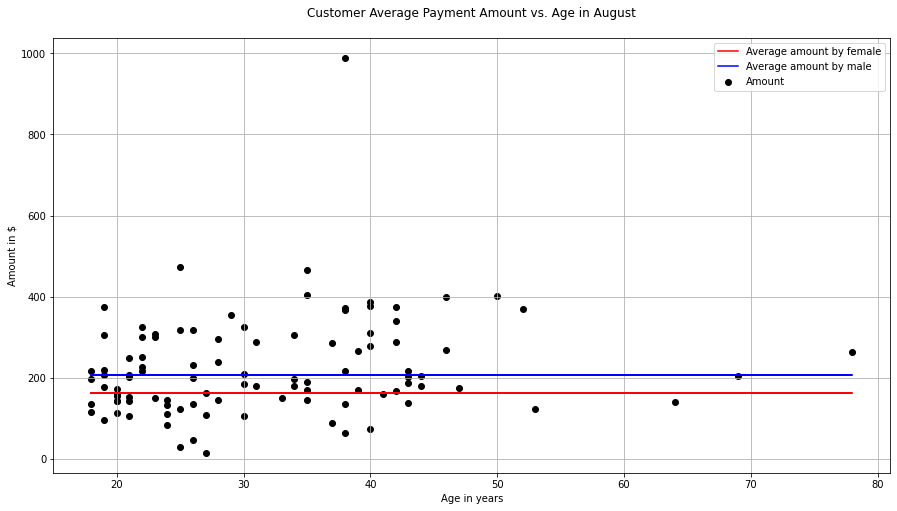

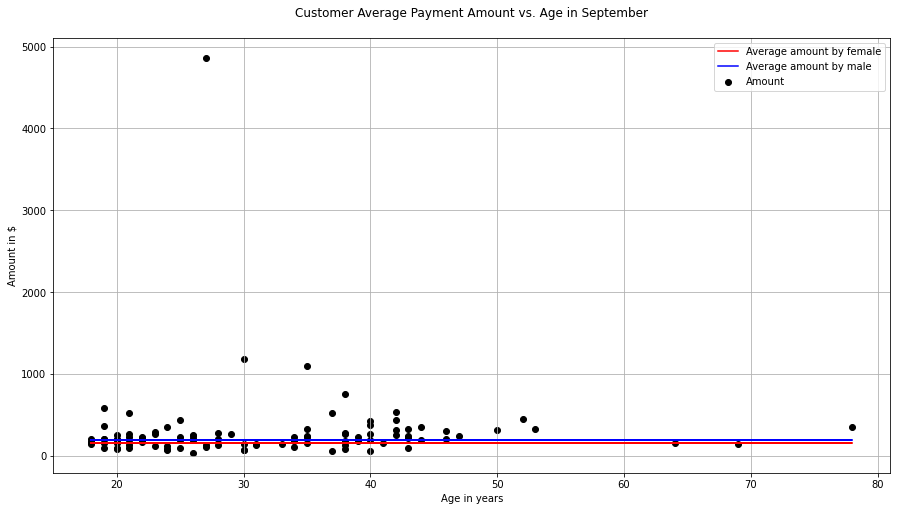

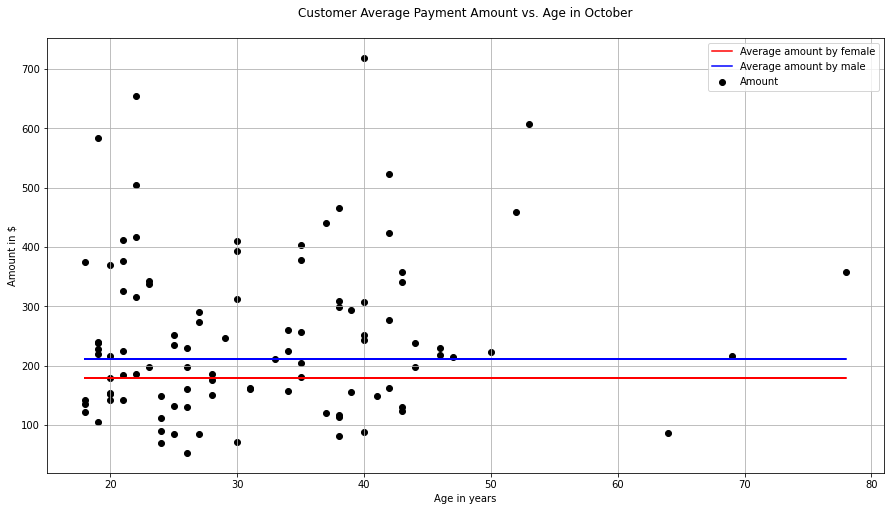

In [28]:
for m in month:
  dataset_cust = dataset[dataset["Month_of_Transaction"] == m].groupby("customer_id").mean()
  dataset_gen = dataset[dataset["Month_of_Transaction"] == m].groupby("gender").mean()

  mean_female_amt = dataset_gen["amount"].iloc[0]
  mean_male_amt = dataset_gen["amount"].iloc[1]
  nPoints=len(dataset_cust["age"])

  plt.figure(figsize=(15,8))
  plt.scatter(dataset_cust["age"], dataset_cust["amount"], c="black", label="Amount")
  plt.plot(dataset_cust["age"], np.linspace(mean_female_amt,mean_female_amt,nPoints), c="r", label = "Average amount by female")
  plt.plot(dataset_cust["age"], np.linspace(mean_male_amt,mean_male_amt,nPoints), c="b", label = "Average amount by male")
  plt.title("Customer Average Payment Amount vs. Age in {}\n".format(m))
  plt.xlabel("Age in years")
  plt.ylabel("Amount in $")  
  plt.grid(True)
  plt.legend()